# 4.2 High degree polynomial interpolation

Suppose we approximate $f(x)$ using its polynomial interpolant $p_{n}(x)$
obtained from $(n+1$) data points. We then increase the number of
data points, and update $p_{n}(x)$ accordingly. The central question
we want to discuss is the following: as the number of nodes (data
points) increases, does $p_{n}(x)$ become a better approximation
to $f(x)$ on $[a,b]?$ We will investigate this question numerically, using a famous example: Runge's function, given by \(f(x)=\frac{1}{1+x^2}\).

We will interpolate Runge's
function using polynomials of various degrees, and plot the function,
together with its interpolating polynomial and the data points. We are interested to see
what happens as the number of data points, and hence the degree of the
interpolating polynomial, increases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We start with taking four equally spaced $x$-coordinates between -5 and
5, and plot the corresponding interpolating polynomial and Runge's
function. Matplotlib allows typing mathematics in captions of a plot using Latex. (Latex is a typesetting
program this book is written with.) Latex commands need to be enclosed by a pair of dollar signs, in addition to a pair of quotation marks.

In [5]:
def newton(x, y, z):
    m = x.size # here m is the number of data points, not the degree
    # of the polynomial
    a = diff(x, y)
    sum = a[0]
    pr = 1.0
    for j in range(m-1):
        pr *= (z-x[j])
        sum += a[j+1]*pr
    return sum

In [6]:
def diff(x, y):
    m = x.size # here m is the number of data points.
    # the degree of the polynomial is m-1
    a = np.zeros(m)
    for i in range(m):
        a[i] = y[i]
    for j in range(1, m):
        for i in np.flip(np.arange(j,m)):
            a[i] = (a[i]-a[i-1]) / (x[i]-x[i-(j)])
    return a

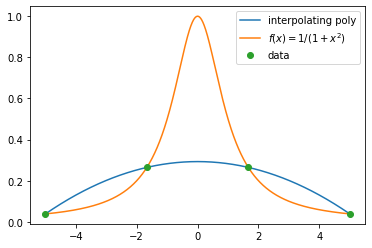

In [7]:
f = lambda x: 1/(1+x**2)
xi = np.linspace(-5, 5, 4) # x-coordinates of the data, 4 points equally spaced from
#-5 to 5 in increments of 10/3
yi = f(xi) # the corresponding y-coordinates
xaxis = np.linspace(-5, 5, 1000) 
runge = f(xaxis) # Runge's function values
interp = newton(xi, yi, xaxis)
plt.plot(xaxis, interp, label='interpolating poly')
plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
plt.plot(xi, yi, 'o', label='data')
plt.legend(loc='upper right');

Next, we increase the number of data points to 6.

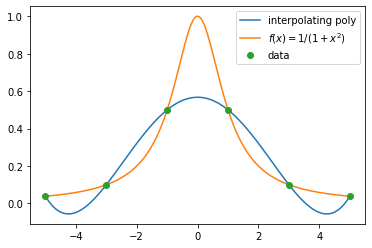

In [8]:
xi = np.linspace(-5, 5, 6) # 6 equally spaced values from -5 to 5
yi = f(xi) # the corresponding y-coordinates
interp = newton(xi, yi, xaxis)
plt.plot(xaxis, interp, label='interpolating poly')
plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
plt.plot(xi, yi, 'o', label='data')
plt.legend(loc='upper right');

The next two graphs plot interpolating polynomials on 11 and 21 equally
spaced data.

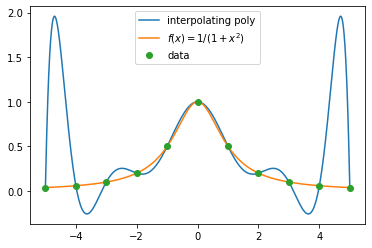

In [9]:
xi = np.linspace(-5, 5, 11) # 11 equally spaced values from -5 to 5
yi = f(xi) # the corresponding y-coordinates
interp = newton(xi, yi, xaxis)
plt.plot(xaxis, interp, label='interpolating poly')
plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
plt.plot(xi, yi, 'o', label='data')
plt.legend(loc='upper center');

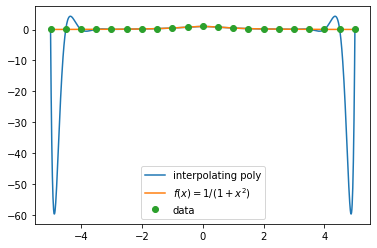

In [10]:
xi = np.linspace(-5, 5, 21) # 21 equally spaced values from -5 to 5
yi = f(xi) # the corresponding y-coordinates
interp = newton(xi, yi, xaxis)
plt.plot(xaxis, interp, label='interpolating poly')
plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
plt.plot(xi, yi, 'o', label='data')
plt.legend(loc='lower center');

We observe that as the degree of the interpolating polynomial increases, the polynomial has large oscillations toward the end points of the interval. In fact, it can be shown that for any $x$ such that $3.64<|x|<5, \sup_{n\geq 0} |f(x)-p_n(x)|=\infty$, where $f$ is Runge's function.

This troublesome behavior of high degree interpolating polynomials improves significantly, if we consider data with $x$-coordinates that are \textbf{not} equally spaced. Consider the interpolation error of Theorem 3 Chapter4-1:
\begin{equation*}
f(x)-p_{n}(x)=\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_{0})(x-x_{1})\cdots(x-x_{n}).
\end{equation*}
Perhaps surprisingly, the right-hand side of the above equation is not minimized when the nodes, $x_i$, are equally spaced! The set of nodes that minimizes the interpolation error is the roots of the so-called Chebyshev polynomials. The placing of these nodes is such that there are more nodes towards the end points of the interval, than the middle. We will learn about Chebyshev polynomials in Chapter 6. Using Chebyshev nodes in polynomial interpolation avoids the diverging behavior of polynomial interpolants as the degree increases, as observed in the case of Runge's function, for sufficiently smooth functions.

## Divided differences and derivatives

The following theorem shows the similarity between divided differences
and derivatives.

\begin{theorem}\label{theo:chap3_thm58}
Suppose $f\in C^{n}[a,b]$ and
$x_{0},x_{1},...,x_{n}$ are distinct numbers in $[a,b].$ Then there
exists $\xi\in(a,b)$ such that
\begin{equation*}
f[x_{0},...,x_{n}]=\frac{f^{(n)}(\xi)}{n!}.
\end{equation*}
\end{theorem}

To prove this theorem, we need the generalized Rolle's theorem.

\begin{theorem}[Rolle's theorem]\label{theo:chap3_thm59}
Suppose $f$ is a differentiable function on $(a,b).$ If $f(a)=f(b),$
then there exists $c\in(a,b)$ such that $f'(c)=0$.
\end{theorem}


\begin{theorem}[Generalized Rolle's theorem]\label{theo:chap3_thm60}
Suppose $f$ has $n$ derivatives on $(a,b).$ If $f(x)=0$ at $(n+1)$
distinct numbers $x_{0},x_{1},...,x_{n}\in[a,b]$, then there exists
$c\in(a,b)$ such that $f^{(n)}(c)=0$.
\end{theorem}

*Proof of Theorem \ref{theo:chap3_thm58}*
Consider the function $g(x)=p_{n}(x)-f(x).$ Observe that $g(x_{i})=0$
for $i=0,1,...,n.$ From generalized Rolle's theorem, there exists
$\xi\in(a,b)$ such that $g^{(n)}(\xi)=0,$ which implies
\begin{equation*}
p_{n}^{(n)}(\xi)-f^{(n)}(\xi)=0.
\end{equation*}
Since $p_{n}(x)=f[x_{0}]+f[x_{0},x_{1}](x-x_{0})+...+f[x_{0},...,x_{n}](x-x_{0})\cdots(x-x_{n-1})$,
$p_{n}^{(n)}(x)$ equals $n!$ times the leading coefficient $f[x_{0},...,x_{n}].$
Therefore
\begin{equation*}
f^{(n)}(\xi)=n!f[x_{0},...,x_{n}].
\end{equation*}